In [1]:
import pandas as pd
from feature_engineering import transform_data
from dimension_reduction import dimension_reduction
from top_categories_per_type import plot_top_categories
from gdp_lat_cleaning import gdp_lat_cleaning
from hierarchical_clustering import plot_heatmap, plot_dendrogram

raw_path = "../data/raw/adr6921_Suppl_Excel_v2.csv"
gdp_path = "../data/raw/worldbank/gdp_per_capita_world_bank.csv"
mean_lat_path = "../data/raw/geo_mean_location.csv"
output_path='../data/processed/'
graph_output_path = '../results/'


In [2]:
# Read in raw data
df = pd.read_csv(raw_path, encoding_errors='replace')
gdp_per_capita = pd.read_csv(gdp_path)
mean_latitude = pd.read_csv(mean_lat_path)

# Transform data and obtain final dataframe with counts of factories by country and attribute category
df = transform_data(df, True, output_path)

# Set 'country' as index
X = df.set_index('country')
# obtain features for clustering
X = X.drop(columns=['total_factories'])

In [14]:
n_components = 4

# Perform dimensionality reduction using NMF
W, H = dimension_reduction(X, n_components=n_components)   

# Obtain list of countries in W
countries = W.index.tolist()

# Create with top categories contributing to each type
top_category_4 = plot_top_categories(H, 30, False)

top_category_4

c:\Users\Elaine\miniforge3\envs\end-use\Lib\site-packages\sklearn\decomposition\_nmf.py:1720: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


alt.FacetChart(...)

In [15]:
# clean gpd and mean latitude dataframes for merging with W
gdp_lat_data = gdp_lat_cleaning(gdp_per_capita, mean_latitude, countries, '2024')

# Drop countries do not have factory data
cleaned_W = W.dropna()

# Merge W with cleaned GDP and latitude dataframes
final_df = cleaned_W.join(gdp_lat_data)

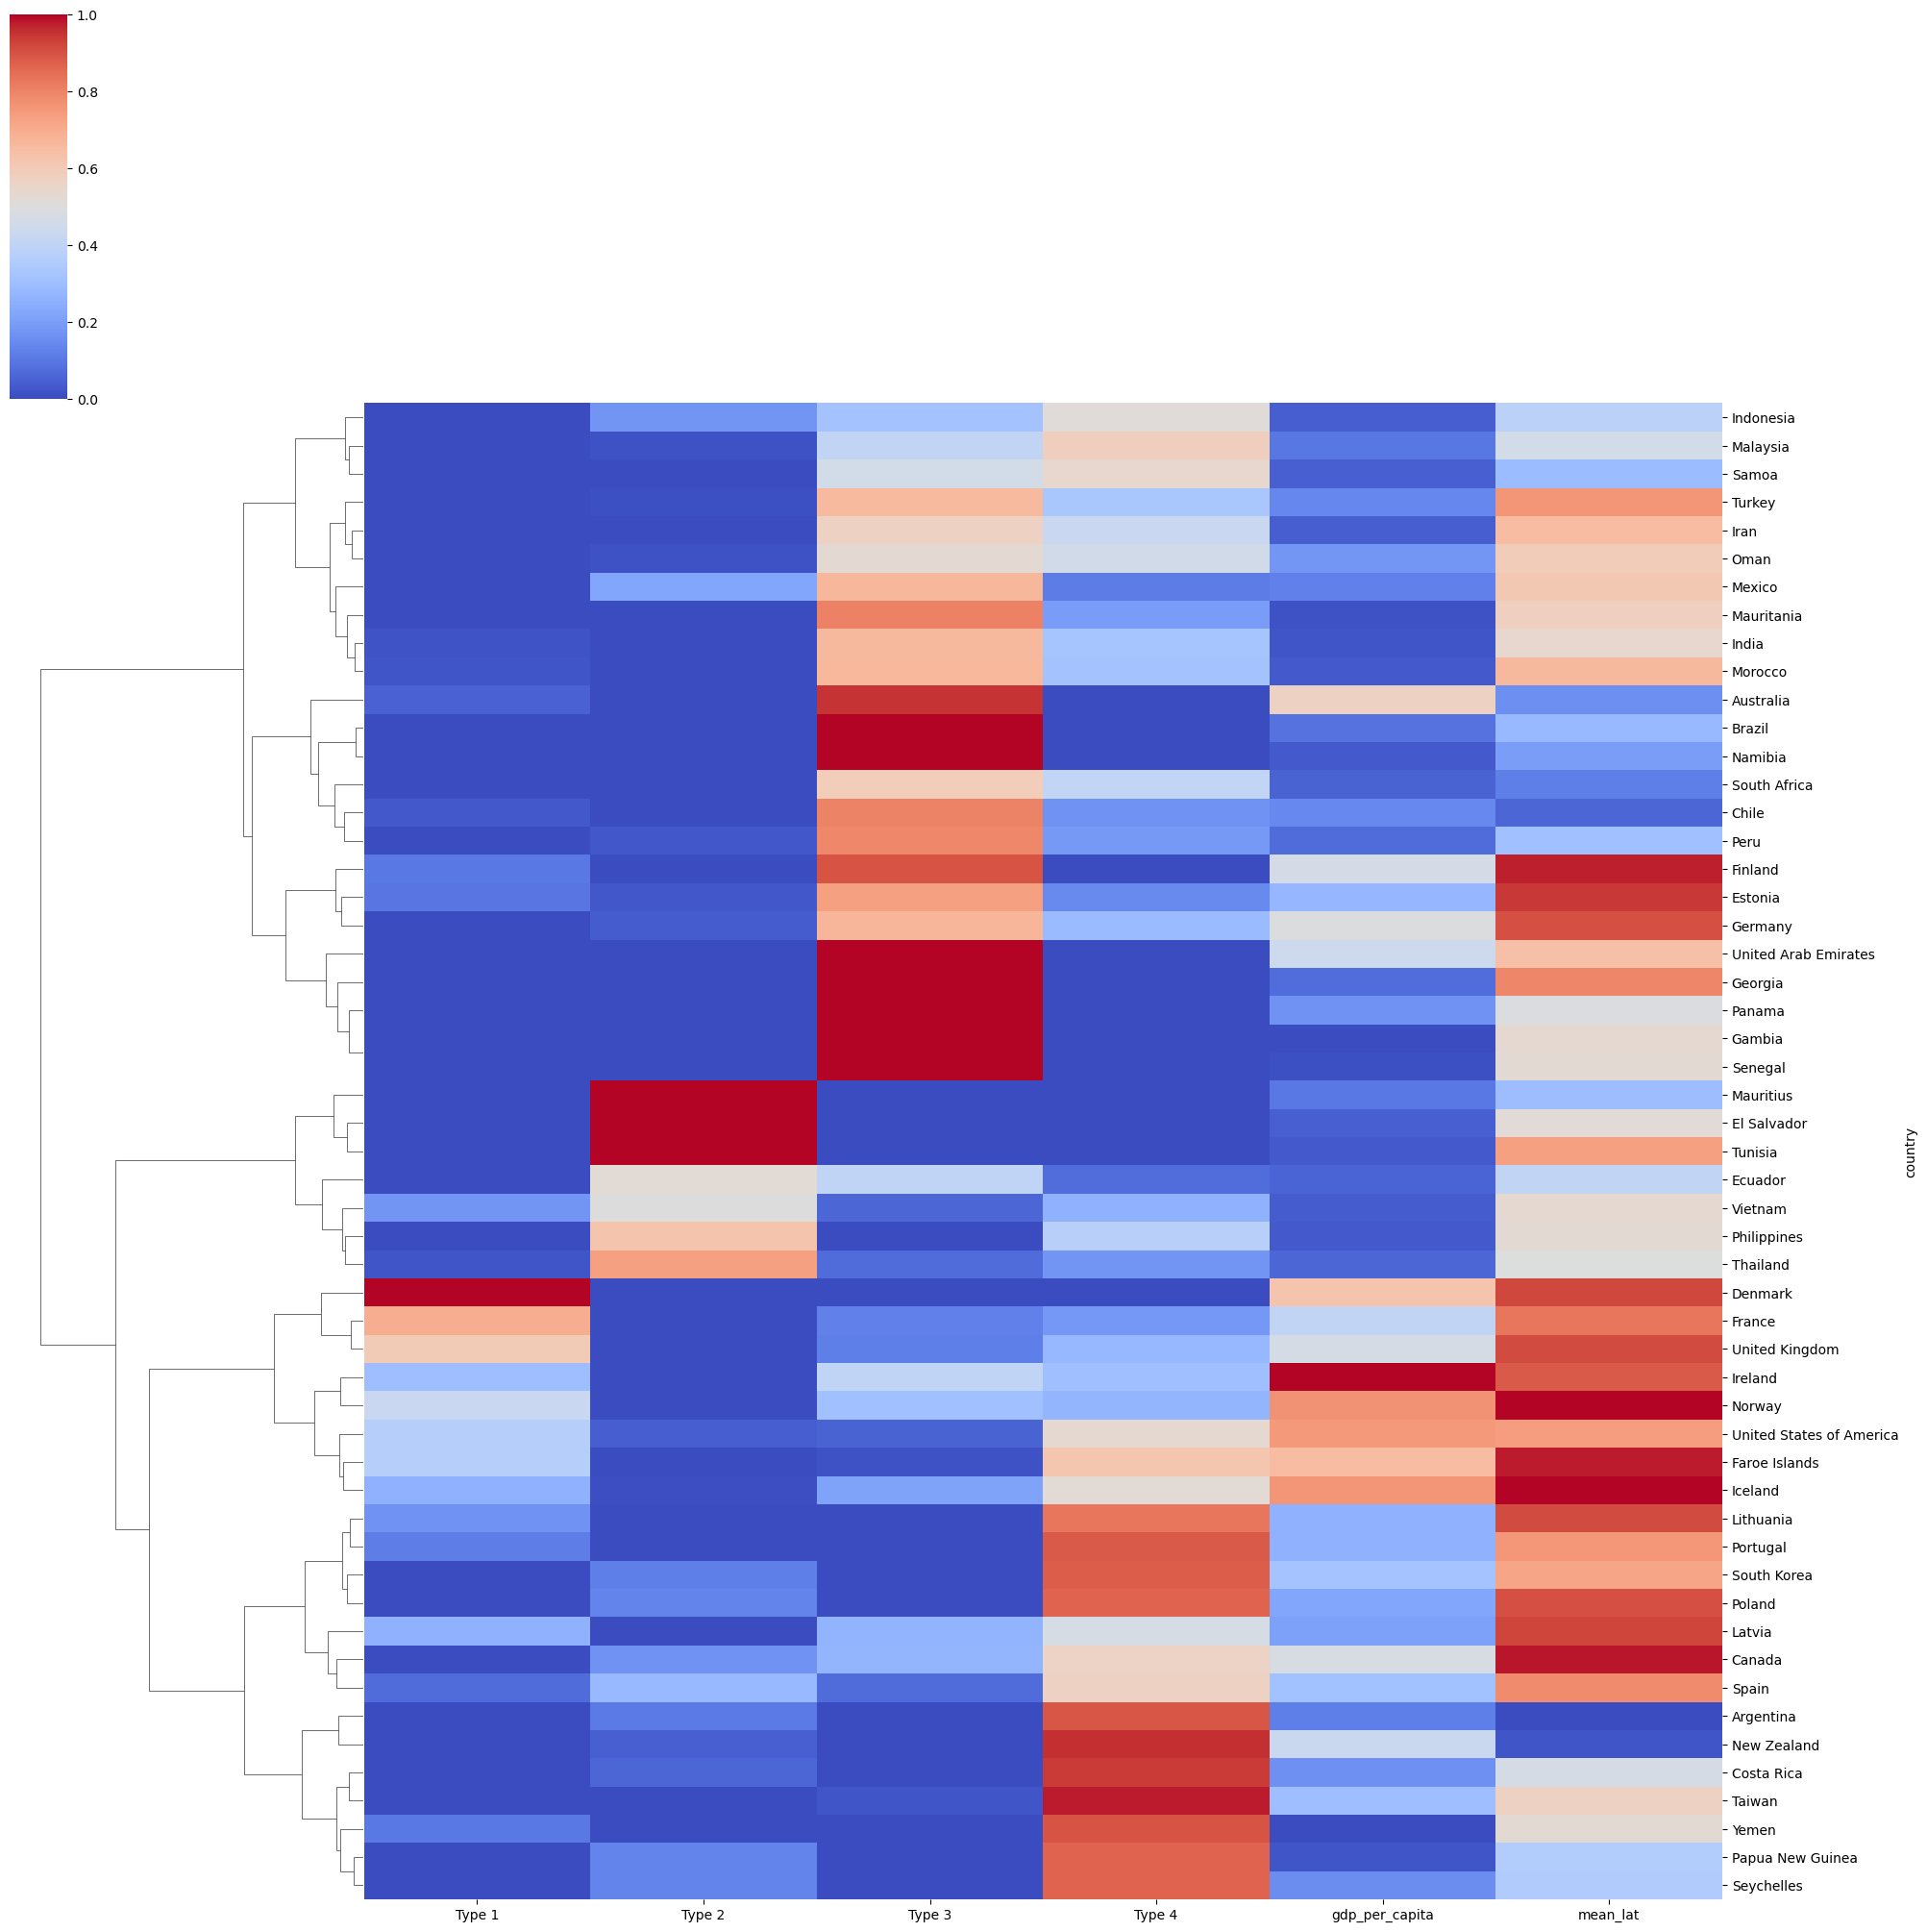

In [17]:
heatmap_4 = plot_heatmap(final_df, save_fig= True, output_path=graph_output_path)

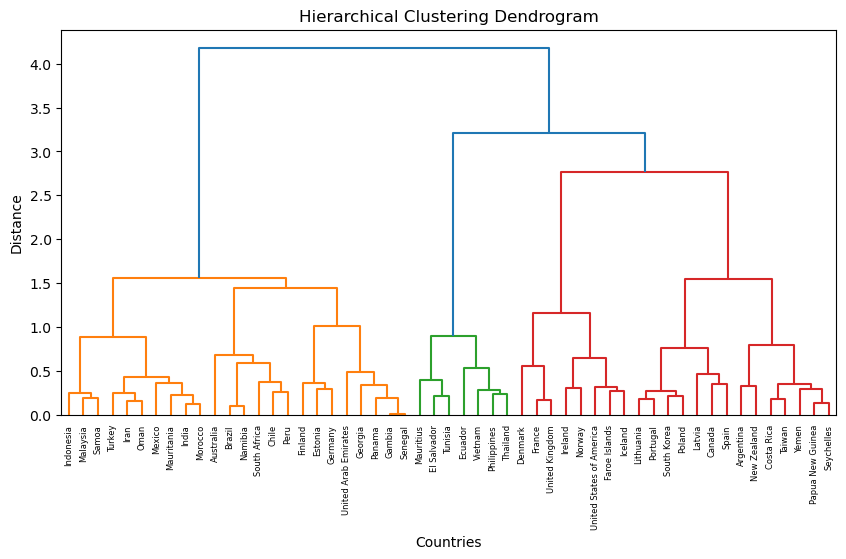

In [18]:
dendrogram_4 = plot_dendrogram(final_df, save_fig= True, output_path=graph_output_path)

In [8]:
n_components = 10

# Perform dimensionality reduction using NMF
W, H = dimension_reduction(X, n_components=n_components)   

# Obtain list of countries in W
countries = W.index.tolist()

# Create with top categories contributing to each type
top_category_10 = plot_top_categories(H, 30, True, graph_output_path)

top_category_10

alt.FacetChart(...)

In [9]:
# clean gpd and mean latitude dataframes for merging with W
gdp_lat_data = gdp_lat_cleaning(gdp_per_capita, mean_latitude, countries, '2024')

# Drop countries do not have factory data
cleaned_W = W.dropna()

# Merge W with cleaned GDP and latitude dataframes
final_df = cleaned_W.join(gdp_lat_data)

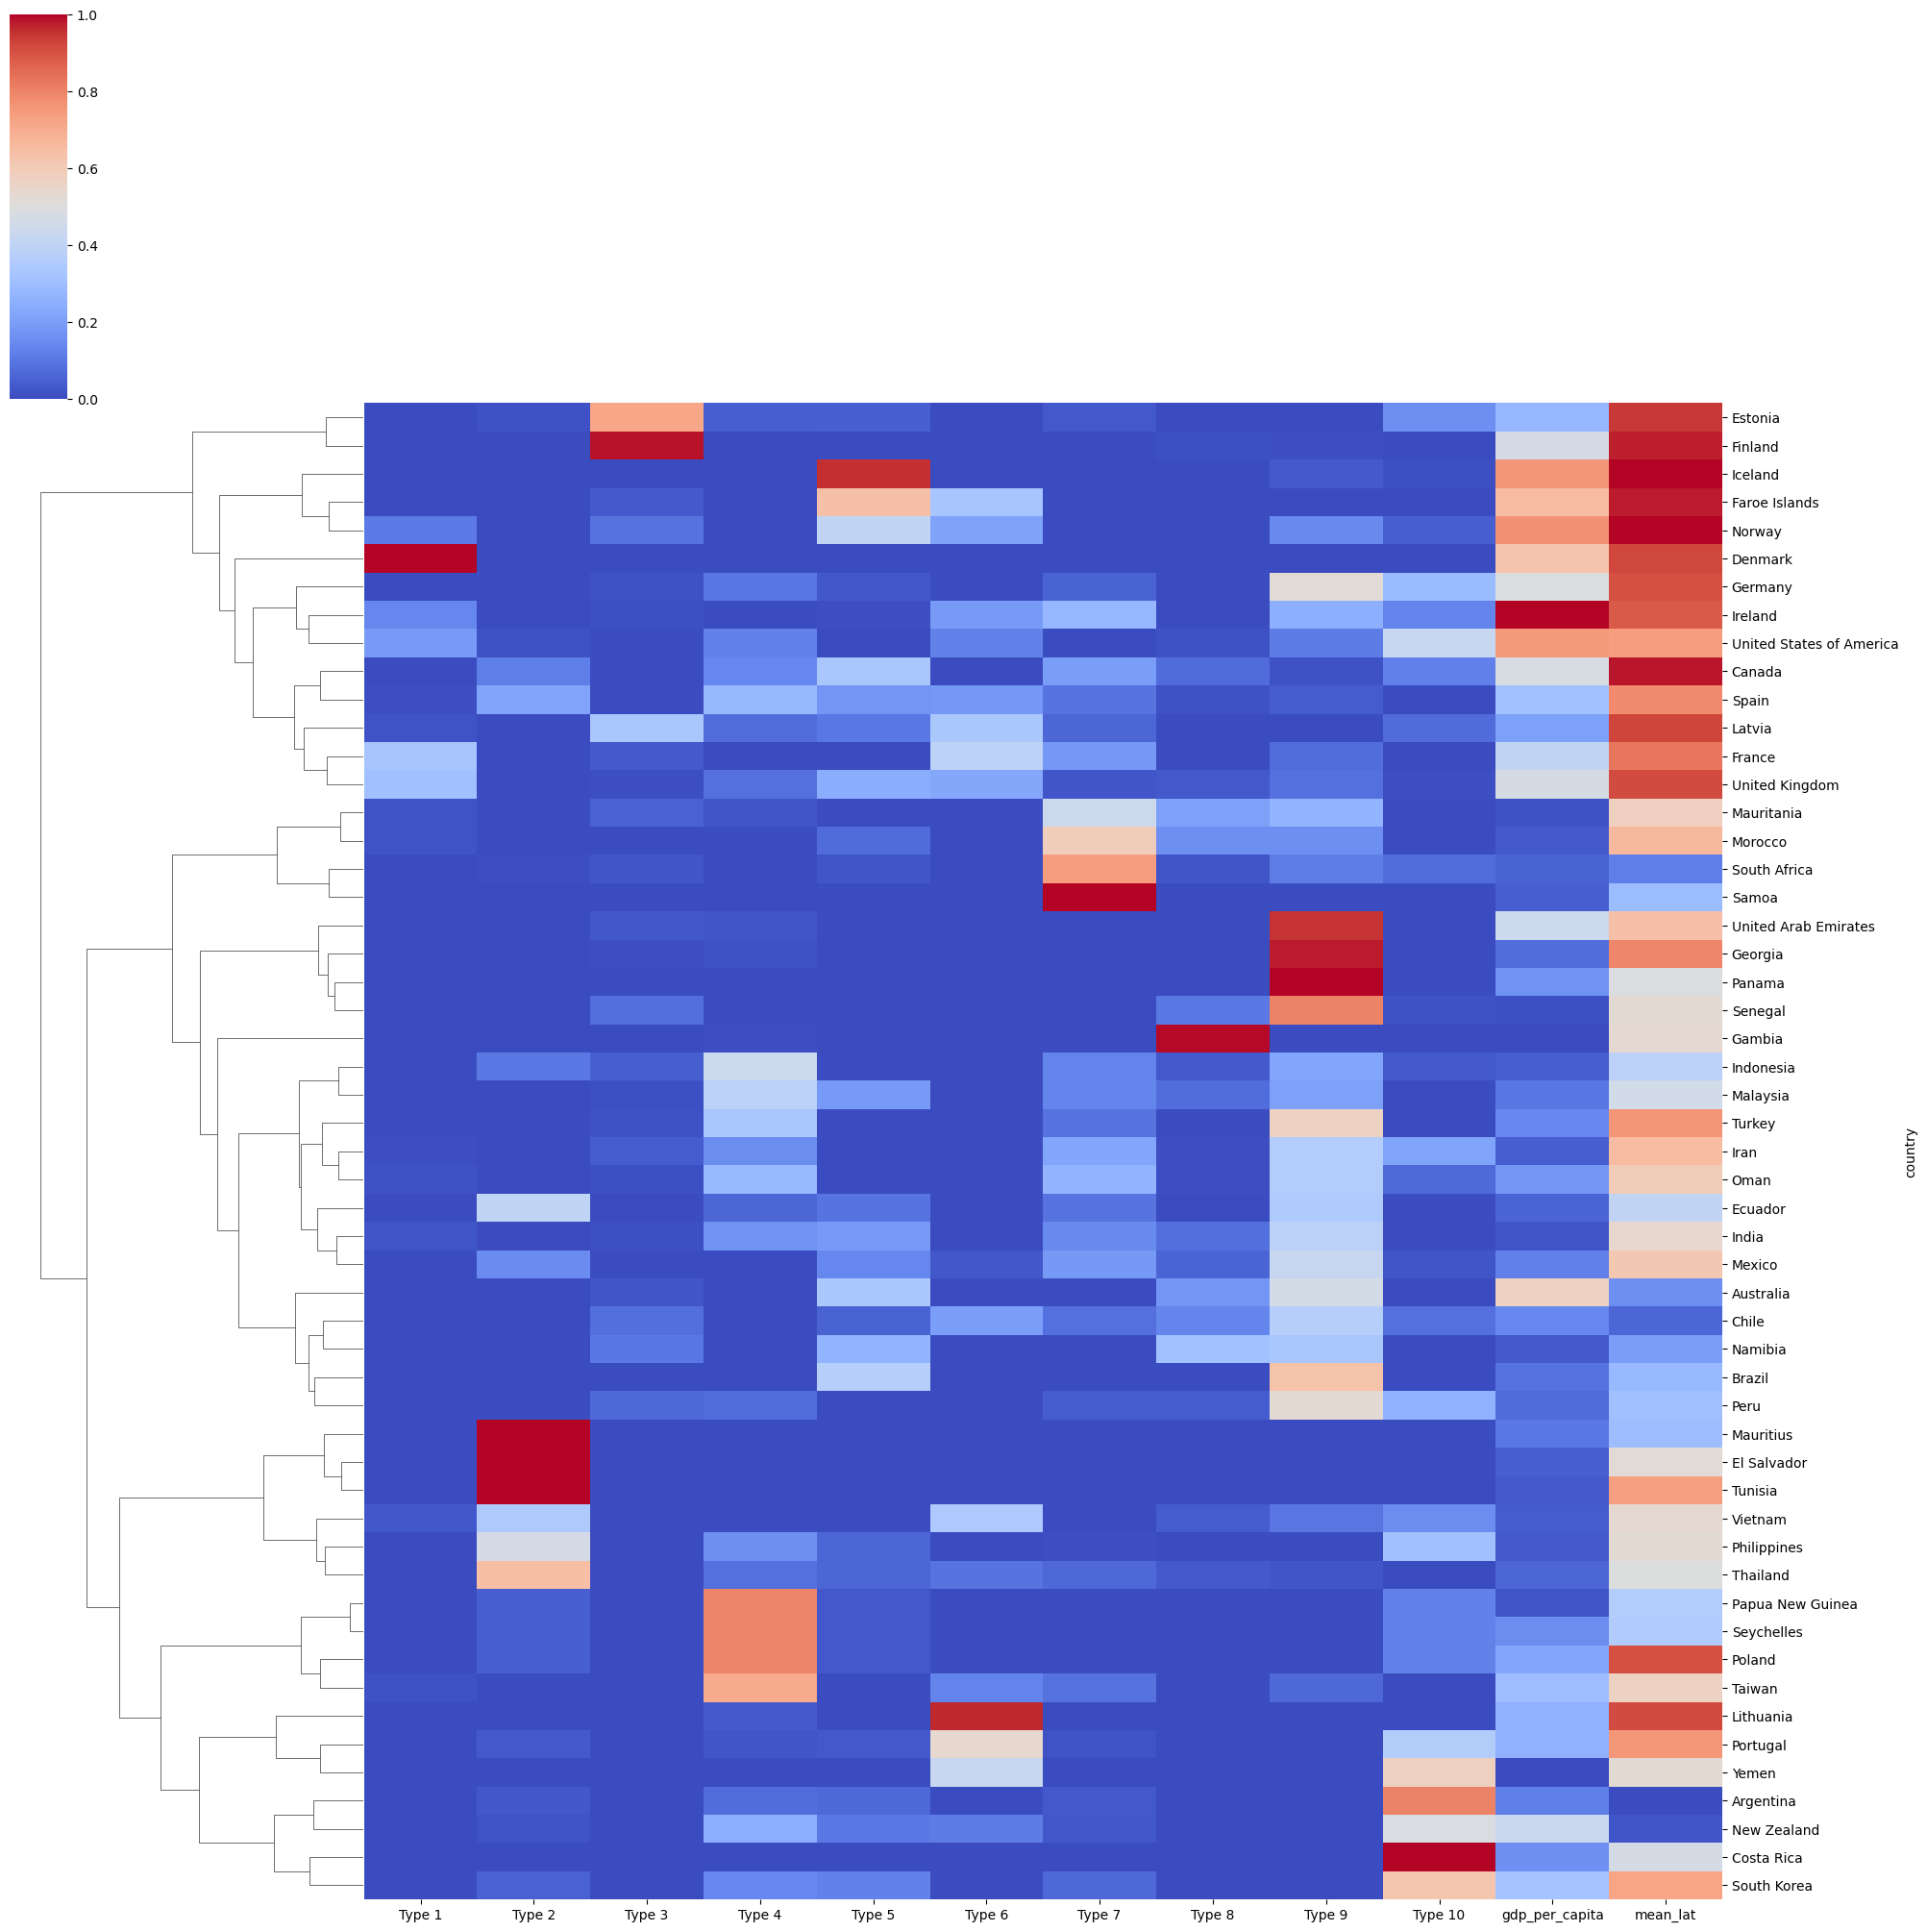

In [13]:
heatmap_10 = plot_heatmap(final_df, save_fig=True, output_path=graph_output_path)

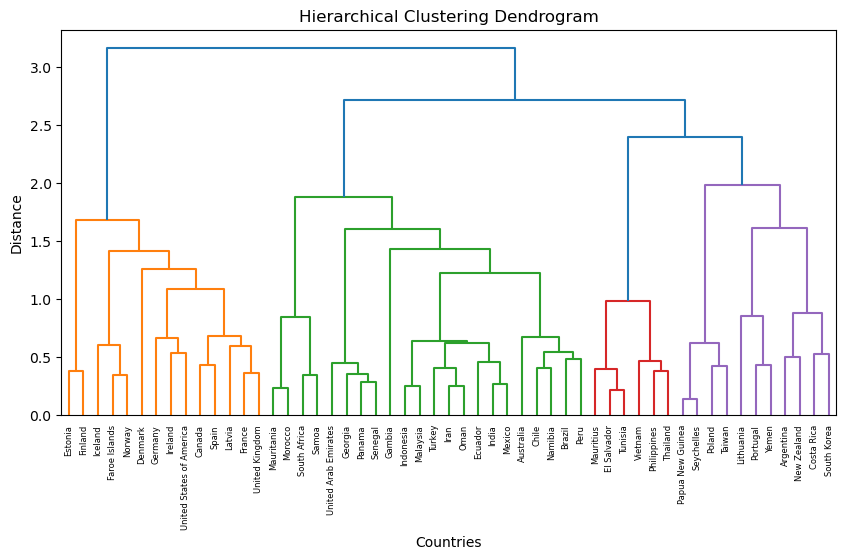

In [12]:
dendrogram_10 = plot_dendrogram(final_df, save_fig=True, output_path=graph_output_path)

In [19]:
n_components = 7

# Perform dimensionality reduction using NMF
W, H = dimension_reduction(X, n_components=n_components)   

# Obtain list of countries in W
countries = W.index.tolist()

# Create with top categories contributing to each type
top_category_7 = plot_top_categories(H, 30, False)

top_category_7

alt.FacetChart(...)

In [20]:
# clean gpd and mean latitude dataframes for merging with W
gdp_lat_data = gdp_lat_cleaning(gdp_per_capita, mean_latitude, countries, '2024')

# Drop countries do not have factory data
cleaned_W = W.dropna()

# Merge W with cleaned GDP and latitude dataframes
final_df = cleaned_W.join(gdp_lat_data)

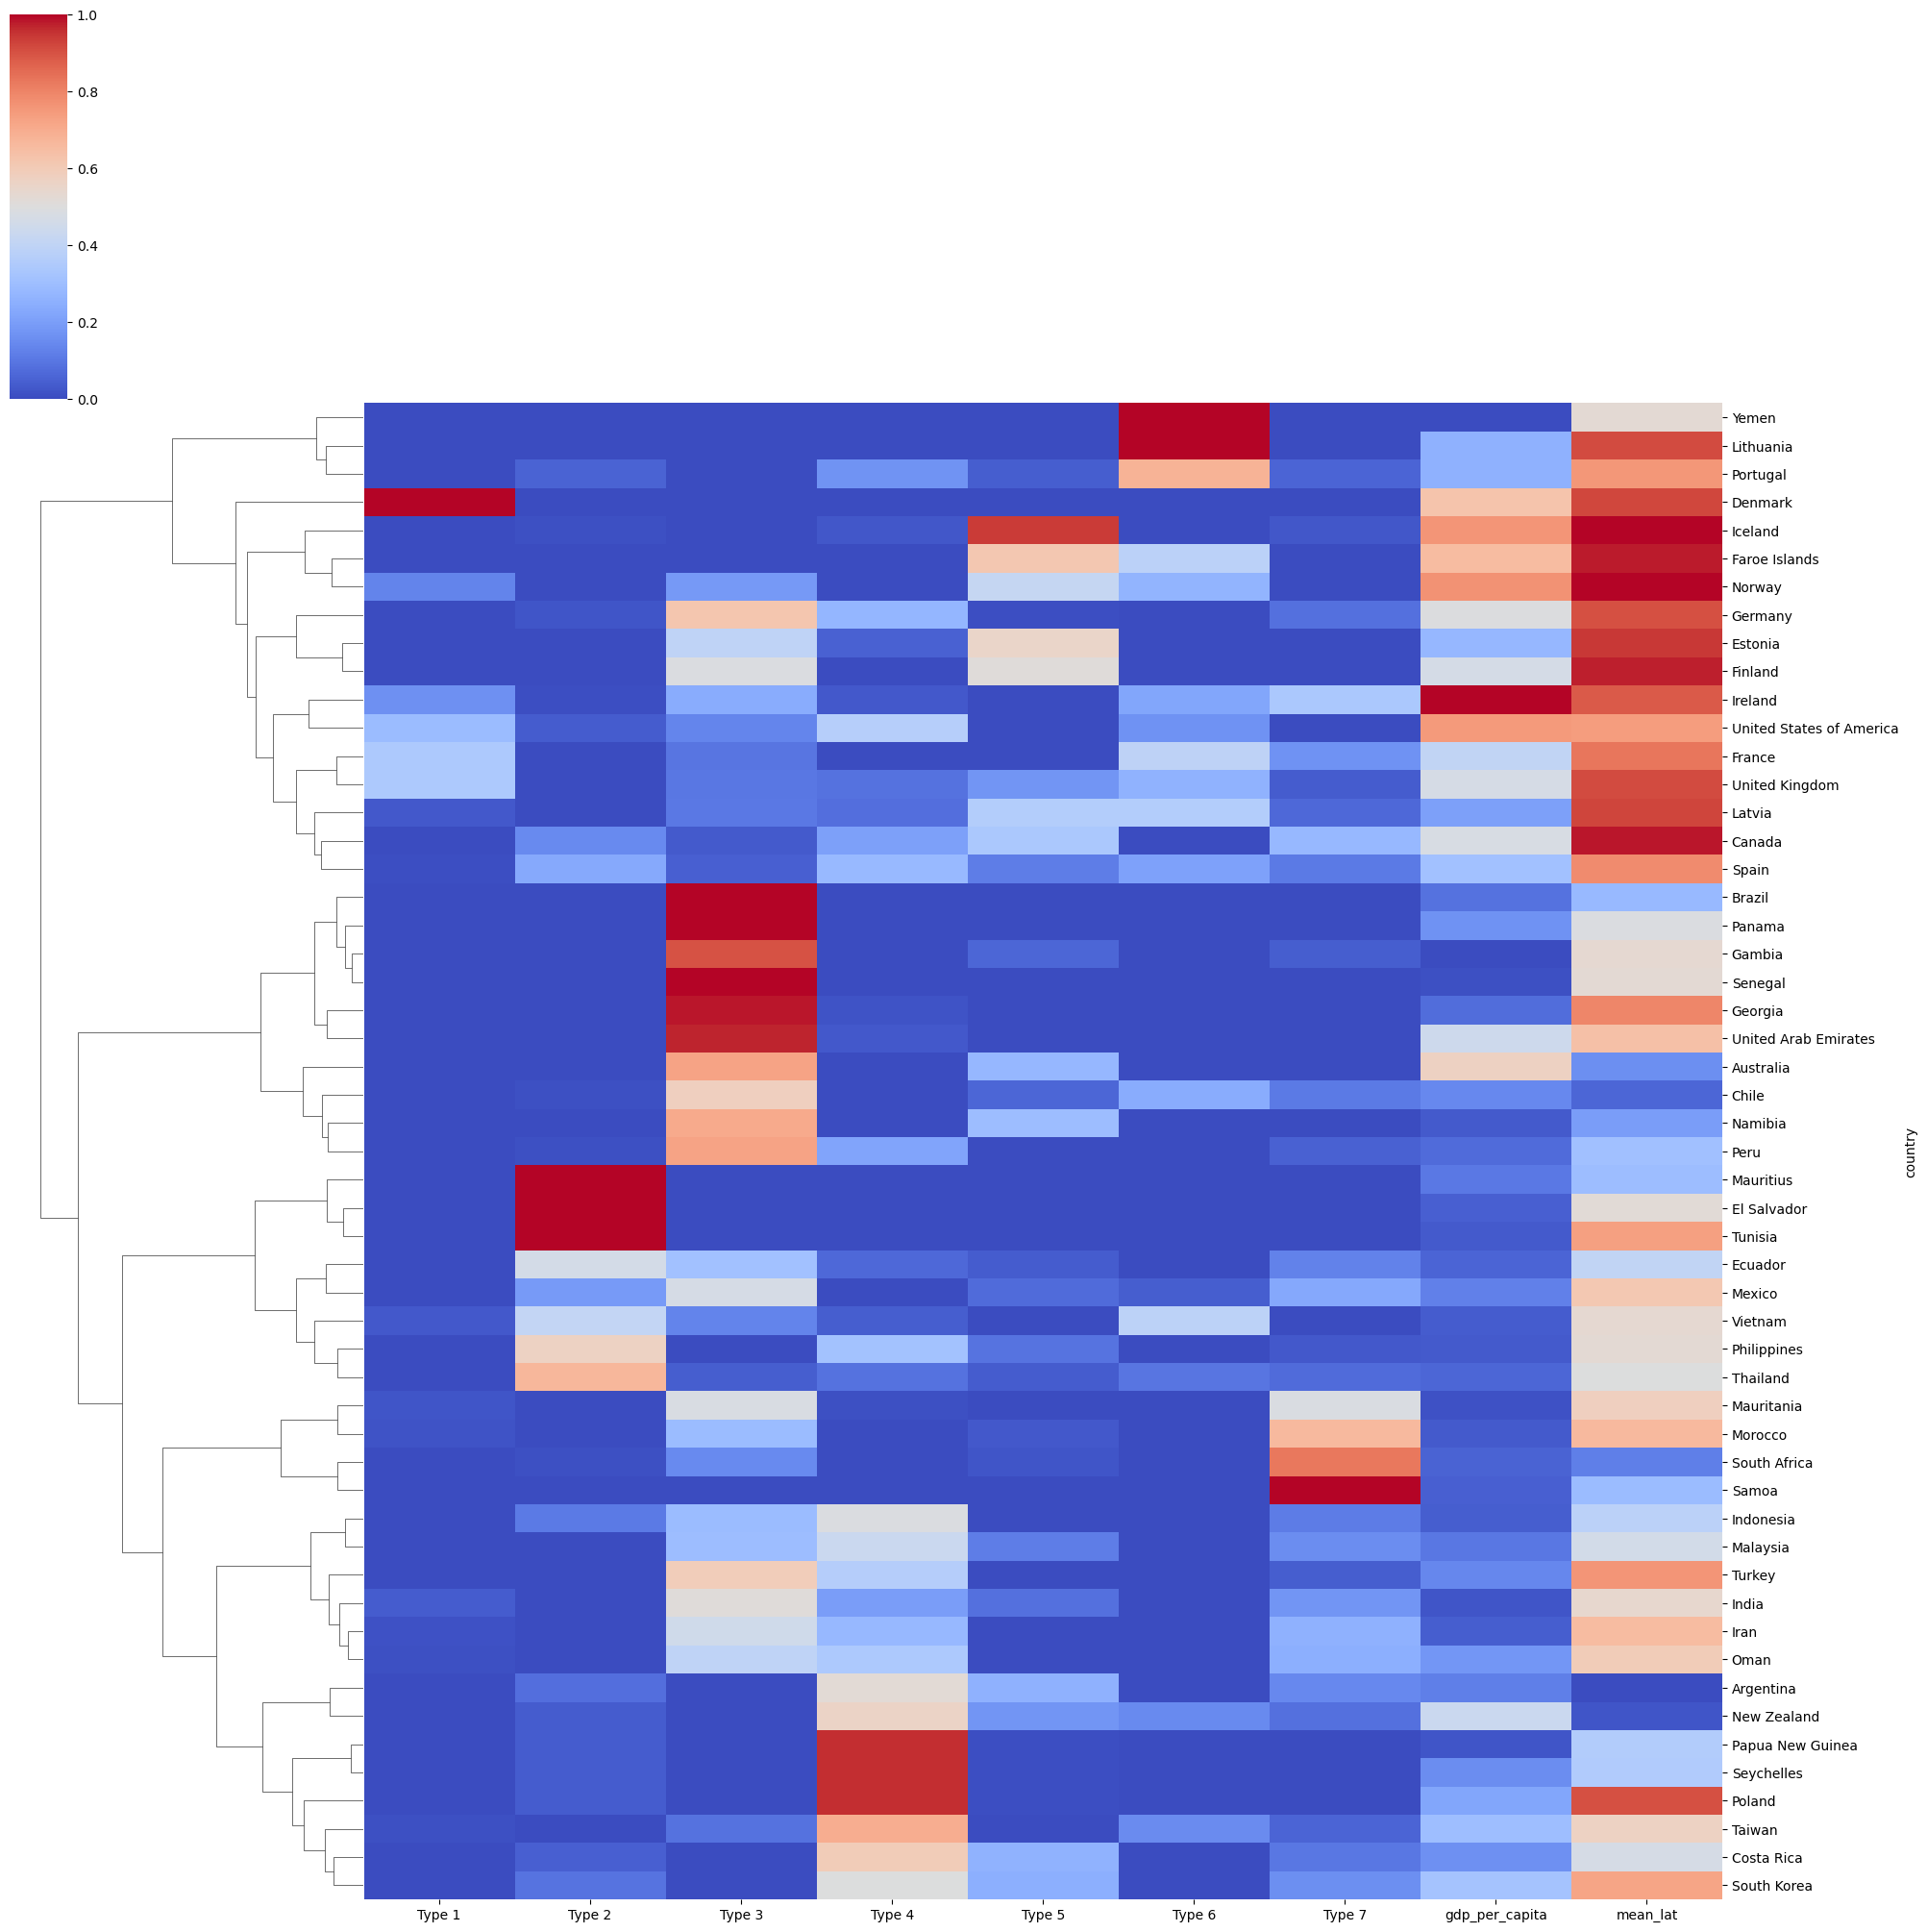

In [21]:
heatmap_7 = plot_heatmap(final_df, save_fig=True, output_path=graph_output_path)

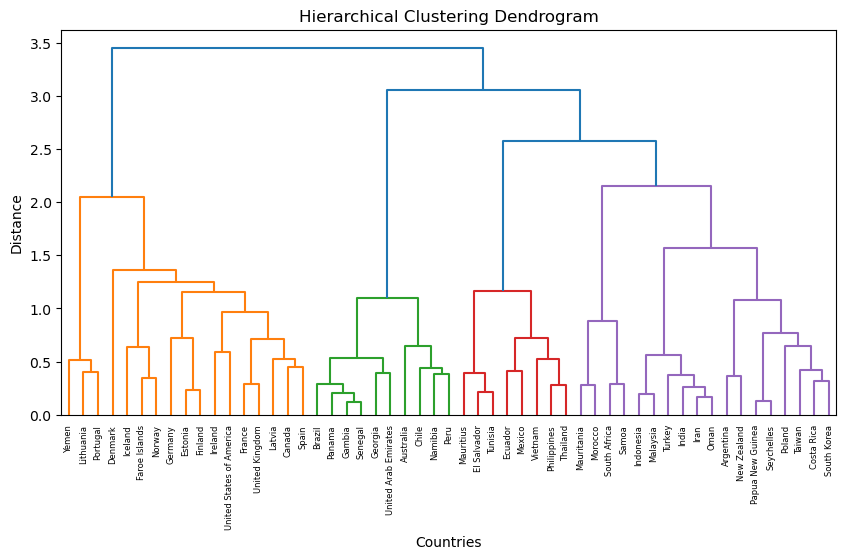

In [22]:
dendrogram_7 = plot_dendrogram(final_df, save_fig=True, output_path=graph_output_path)